# Import libraries

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import array
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
Apple_data_raw = pd.read_csv('AAPL.csv')
Apple_data_raw.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


<AxesSubplot:>

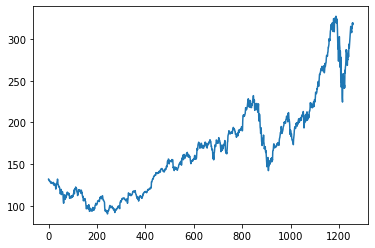

In [3]:
# Closing Price
Apple_data_close = Apple_data_raw['close']
Apple_data_raw['close'].plot()

In [4]:
#Scaling Data
Apple_data_close = np.array(Apple_data_close)
Apple_data_close = Apple_data_close.reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0,1))
Apple_data_close = scaler.fit_transform(Apple_data_close)
print(Apple_data_close)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [5]:
#Splitting Data
training_size = int(len(Apple_data_close)*0.65)
test_size = len(Apple_data_close)-training_size
train_data,test_data  =Apple_data_close[0:training_size,:], Apple_data_close[training_size:len(Apple_data_close),:1]
train_data.shape

(817, 1)

In [6]:
test_data.shape

(441, 1)

In [7]:
training_size, test_size

(817, 441)

In [8]:
train_data[:10]

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817]])

In [9]:
#splitting window on the dataset.
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
train_data.shape, test_data.shape

((817, 1), (441, 1))

In [11]:
# total = 817 + 441 = 1258
trainplot = np.arange(1,818)
# allocate series
testplot = np.arange(818,1259)

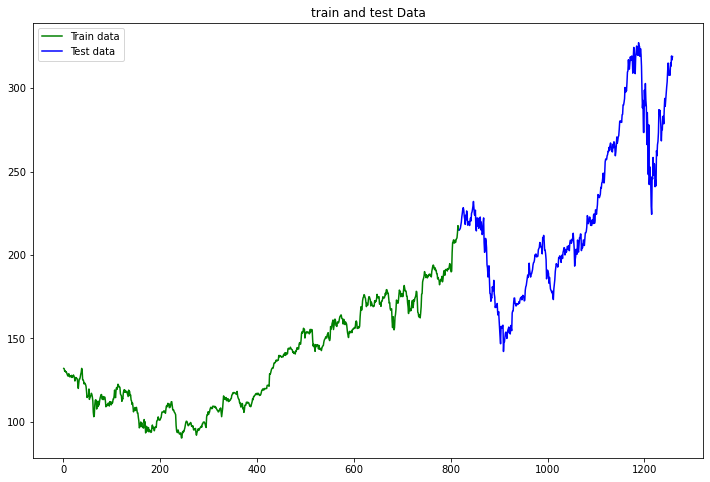

In [12]:
# pLoting Train and test
plt.figure(figsize=(12,8))
plt.plot(trainplot,scaler.inverse_transform(train_data)[:,0], 'green', label='Train data')
plt.plot(testplot, scaler.inverse_transform(test_data)[:,0], 'blue', label='Test data')
plt.legend()
plt.title('train and test Data')
plt.show()

# Model Building (linear Regression)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
pred = model.predict(X_test)
print("Predicted Value", pred[:10][0])
print("Expected Value", y_test[:10][0])

Predicted Value 0.26591241262096654
Expected Value 0.2727349489149709


In [15]:
pred_apple = pd.DataFrame(pred)
pred_apple["TrueValues"] = y_test

In [16]:
new_pred = pred_apple.rename(columns = {0: 'Predictions'})
new_pred.head()

,Predictions,TrueValues
0,0.265912,0.272735
1,0.267869,0.276619
2,0.289373,0.280672
3,0.286837,0.265811
4,0.264365,0.268429


Text(0.5, 1.0, 'Predictions VS True values on test set')

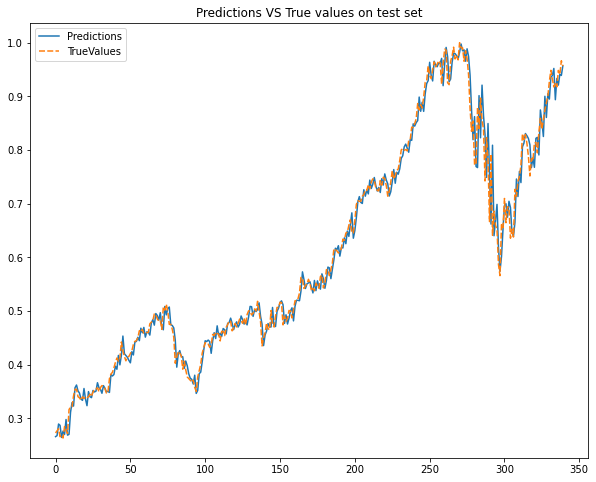

In [17]:
plt.figure(figsize=(10,8))
sns.lineplot(data=new_pred)
plt.title("Predictions VS True values on test set")

In [18]:
print("model Accuracy on training data:", model.score(X_train, y_train))

model Accuracy on training data: 0.9970342320018716


In [19]:
print("model Accuracy on testing data", model.score(X_test,y_test))

model Accuracy on testing data 0.9847722212152704


In [20]:
# Lets Do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

In [21]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [22]:
# Calculate RMSE metrics
math.sqrt(mean_squared_error(y_train,train_predict))

142.1363100026703

In [23]:
# Test DAta RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

238.13157949250513

[eng]
This prediction is only short-term. We wont recommend to use this model for medium to long term forecast periods, as it depreciates in performance. Not because our Linear model is bad, but, because Stock markets are highly volatile.
[esp]
Esta predicción es solo a corto plazo. No recomendaremos utilizar este modelo para períodos de pronóstico a mediano y largo plazo, ya que se deprecia en rendimiento. No porque nuestro modelo lineal sea malo, sino porque los mercados de valores son altamente volátiles.